In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 3.9 MB/s 


In [ ]:
!python -m spacy download es_core_news_md


2022-09-22 21:25:13.731248: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.3 MB 153 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [ ]:
from io import IncrementalNewlineDecoder
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.utils import shuffle
import pandas as pd
import re
import numpy as np
import es_core_news_md
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import unidecode
import unicodedata
import warnings
warnings.filterwarnings('ignore')
#spacy
stop_words_spacy = list(STOP_WORDS)

print(stop_words_spacy)

['ningunas', 'cada', 'ellas', 'hemos', 'mayor', 'consigues', 'igual', 'ni', 'aquí', 'mío', 'menos', 'verdadera', 'conocer', 'propios', 'esa', 'aquél', 'indicó', 'grandes', 'último', 'unos', 'cuantos', 'veces', 'yo', 'nosotras', 'verdadero', 'primero', 'tiene', 'ésas', 'tras', 'existen', 'hacia', 'alli', 'dicho', 'algún', 'les', 'realizó', 'fue', 'dio', 'qué', 'porque', 'expresó', 'señaló', 'tendrá', 'dos', 'ella', 'largo', 'esos', 'demás', 'los', 'otra', 'también', 'seis', 'fin', 'hace', 'nueva', 'dieron', 'ningún', 'ahora', 'y', 'además', 'después', 'podria', 'eran', 'dicen', 'puede', 'apenas', 'estas', 'aquello', 'incluso', 'ante', 'posible', 'dentro', 'ciertas', 'ultimo', 'pesar', 'estoy', 'han', 'propio', 'sido', 'últimos', 'conseguimos', 'hablan', 'vez', 'un', 'están', 'sigue', 'contra', 'buena', 'poca', 'realizado', 'u', 'usar', 'verdad', 'vuestro', 'sabes', 'debido', 'ésa', 'ese', 'sola', 'mucha', 'será', 'ser', 'qeu', 'aquella', 'estará', 'dejó', 'mismos', 'siete', 'aquellos', 

In [ ]:
data = pd.read_csv('/nuevod3.csv')
data = data.drop_duplicates(subset=["Groserias"], keep=False)
data.head(15)

,Unnamed: 0,Unnamed: 0.1,Column1,Groserias,Vulgar,Agresivo,Ofensivo,Unnamed: 0.1.1
0,2513,5203,NaN,"@EnriqueAlfaroR ¿Oye GORDO, y qué respuesta da...",0,0,1,5203.0
1,585,3030,NaN,La parte más importante del cuerpo es el cereb...,0,0,0,3030.0
2,1374,265,265.0,"a mi no, pero a mi bicho lo ama",0,0,0,NaN
3,3393,4867,NaN,Jamás confiaré en un “abogado” que cite e idol...,0,0,0,4867.0
4,298,2033,2033.0,La naty y la lenteja https://t.co/f260wp2wst,0,0,0,NaN
5,862,2848,2848.0,@vjmc Usted no ha entendido el cambio cultural...,0,0,0,NaN
6,1222,5775,NaN,@c4jimenez @FiscaliaCDMX @FiscaliaEdomex @SS_E...,1,0,1,5775.0
7,679,1786,NaN,No es tu celular… Waze se cae a nivel mundial ...,0,0,0,1786.0
8,1088,4152,NaN,"Me duele la puta cabeza, este abismo sigue lla...",1,0,0,4152.0
9,423,5319,NaN,@Thixinho La vieja escuela manda ALV !!!!,1,0,0,5319.0


In [ ]:
#data = shuffle(data)
#data.head(15)


In [ ]:
# Removing stopwords in a string
palabras_parada = []
nlp = spacy.load('es_core_news_md')

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (palabras_parada)])
    return text
 
#Lemmatizing the text in a string
def lemmatize_text(text):
    text = [word.lemma_ for word in nlp(text)]
    text = ' '.join(text)
    return text


#substituting accents in a string
def remove_accents(text):
    
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    
    return text


#removing twitter users in a string
def remove_users(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())

    return text

#removing urls in a string
def remove_urls(text):
    text = re.sub(r'http\S+','',text)
    return text

# Text to lowercase in a string
def text_to_lowercase(text):
    text = text.lower()
    return text

#removing numbers in a string
def remove_numbers(text):
    text = re.sub(r'\d+','',text)
    return text


#removing special characters in a string
def remove_special_characters(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

for palabra in spacy.lang.es.stop_words.STOP_WORDS:
    palabras_parada.append(remove_accents(palabra))

# Cleaning the text
def clean_text(text):
    text = remove_accents(text)

    text = remove_users(text)
    
    text = remove_urls(text)
    
    text = remove_numbers(text)
    
    #text = remove_special_characters(text)
    
    text = text_to_lowercase(text)
    #text = remove_stopwords(text)
    text = lemmatize_text(text)
    #print(text)

    return text

data["Groserias"] = data["Groserias"].apply(clean_text)
data.head(15)


,Unnamed: 0,Unnamed: 0.1,Column1,Groserias,Vulgar,Agresivo,Ofensivo,Unnamed: 0.1.1
0,2513,5203,NaN,oir gordo y que respuestar da a el funcionario...,0,0,1,5203.0
1,585,3030,NaN,el parte mas importante del cuerpo ser el cere...,0,0,0,3030.0
2,1374,265,265.0,a mi no pero a mi bicho él amar,0,0,0,NaN
3,3393,4867,NaN,jamas confiare en uno abogado que citar e idol...,0,0,0,4867.0
4,298,2033,2033.0,el naty y el lentejo,0,0,0,NaN
5,862,2848,2848.0,usted no haber entender el cambio cultural roj...,0,0,0,NaN
6,1222,5775,NaN,edomex que poco madre tener este pinche gobier...,1,0,1,5775.0
7,679,1786,NaN,no ser tu celular waze él caer a nivel mundial,0,0,0,1786.0
8,1088,4152,NaN,yo doler el puta cabeza este abismo seguir llamar,1,0,0,4152.0
9,423,5319,NaN,el viejo escuela mandar alv,1,0,0,5319.0


# Sección nueva

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(max_features=5000)
data = shuffle(data)
X = data['Groserias']
y = data['Ofensivo']
X = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

dato = clean_text("buenos dias como estas el dia de hoy")

vec = tfidf.transform([dato])

print(clf.predict(vec))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       750
           1       0.80      0.77      0.79       730

    accuracy                           0.79      1480
   macro avg       0.79      0.79      0.79      1480
weighted avg       0.79      0.79      0.79      1480

[0]


In [ ]:
print(X_train)

In [ ]:
X = data['Groserias']
y = data['Ofensivo']
#X = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50)
vect = CountVectorizer(ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
clf = LogisticRegression()
clf.fit(X_train_vectorized, y_train)
predictions = clf.predict(vect.transform(X_test))
print(roc_auc_score(y_test,predictions))

0.806337899543379


In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = clf.coef_[0].argsort()

print(feature_names[sorted_coef_index[:100]])

['mi' 'hoy' 'feliz' 'yo' 'malo' 'bonito' 'tarde' 'ser que' 'tiempo' 'via'
 'senoro' 'realidad' 'wey' 'dia' 'jamas' 'diputado corrupto'
 'diputado corrupto cinico' 'nuestro' 'desde' 'persona' 'dios' 'nivel'
 'unico' 'ver con' 'vida' 'pasar' 'ese ser' 'corazon' 'narco' 'gustar'
 'dolor' 'color' 'real' 'viejo lesbiano' 'lesbiano' 'querer' 'alguien'
 'ese de' 'escuchar' 'cabeza' 'no mames' 'poder' 'él que' 'paz' 'mundo'
 'hombre' 'pa' 'coraje' 'no él' 'refrito' 'cosa' 'grupo' 'cabron' 'facil'
 'ano' 'dos' 'mujer' 're' 'cabronado' 'evitar' 'ojo' 'cambiar'
 'uno marrano' 'salud' 'buen' 'cita' 'mames' 'el vida' 'porque ser'
 'golazo' 'tipo de' 'en este' 'policia' 'de que' 'gooooooooooooooool'
 'trabajar' 'vocero ya ver' 'vocero ya' 'vocero' 'el viejo'
 'viejo sabroso' 'que pasar' 'tu gato' 'gooooooooooooooool hdp' 'el mejor'
 'mi cerebro' 'para' 'en' 'dia de mierda' 'buscar' 'momento' 'afectar'
 'mas que' 'venezolano' 'invitar' 'mes' 'ansiedad' 'nadie' 'manera'
 'basura tu']


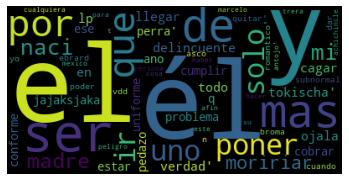

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['Groserias'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()